
### Supervised Learning
### Activity: Building a Student Intervention System

### Question 1 - Classification vs. Regression
*Your goal for this project is to identify students who might need early intervention before they fail or pass. Which type of supervised learning problem is this, classification or regression? Why?*

Classification
In machine learning, classification refers to a predictive modeling problem where a class label is predicted for a given example of input data.Here we need to predict whether the students are pass or fail.

### Question-2
load necessary Python libraries and load the student data. Note that the last column from this dataset, `'passed'`, will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
# Read student data
data = pd.read_csv(r'C:\ict\Activities\week 11\student-data.csv')
data


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,no,no,5,5,4,4,5,4,11,no
391,MS,M,17,U,LE3,T,3,1,services,services,...,yes,no,2,4,5,3,4,2,3,yes
392,MS,M,21,R,GT3,T,1,1,other,other,...,no,no,5,5,3,3,3,3,3,no
393,MS,M,18,R,LE3,T,3,2,services,other,...,yes,no,4,4,1,3,4,5,0,yes


### Question-3
Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
- The total number of students, `n_students`.
- The total number of features for each student, `n_features`.
- The number of those students who passed, `n_passed`.
- The number of those students who failed, `n_failed`.
- The graduation rate of the class, `grad_rate`, in percent (%).


The total number of students, `n_students`.

In [25]:
n_students = data.shape[0]
n_students 

395

The total number of features for each student, `n_features`.

In [26]:
n_features = data.shape[1]
n_features

31

The number of those students who passed, `n_passed`.

In [27]:
n_passed = data.passed.value_counts().yes
n_passed

265

The number of those students who failed, `n_failed`.

In [28]:
n_failed = data.passed.value_counts().no
n_failed

130

The graduation rate of the class, `grad_rate`, in percent (%).

In [29]:
grad_rate=(n_passed/n_students)*100
grad_rate

67.08860759493672

 Print the results

In [30]:
print('n_students =',n_students)
print('n_features =',n_features)
print('n_passed =',n_passed)
print('n_failed =',n_failed)
print('grad_rate =',grad_rate)

n_students = 395
n_features = 31
n_passed = 265
n_failed = 130
grad_rate = 67.08860759493672


## Preparing the Data
you will prepare the data for modeling, training and testing.

### Question-4 Identify feature and target columns


separate the student data into feature and target columns to see if any features are non-numeric.

In [31]:
# Extract feature columns
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'passed'],
      dtype='object')

In [32]:
# Extract target column 'passed'
data['passed']

0       no
1       no
2      yes
3      yes
4      yes
      ... 
390     no
391    yes
392     no
393    yes
394     no
Name: passed, Length: 395, dtype: object

In [33]:
# Separate the data into feature data and target data (X and y, respectively)

x=data.drop(['school','sex','address','famsize', 'Pstatus','Mjob', 'Fjob', 'reason', 'guardian','schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic','passed'],axis=1)
y=data['passed']

### Question-5 Preprocess Feature Columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.

In [34]:
data.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
passed        object
dtype: object

In [35]:
data_dummiencoded= pd.get_dummies(data)
data_dummiencoded

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,passed_no,passed_yes
0,18,4,4,2,2,0,4,3,4,1,...,0,1,0,1,1,0,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,0,1,0,1,1,0,1,0
2,15,1,1,1,2,3,4,3,2,2,...,0,1,0,1,0,1,1,0,0,1
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,0,1,0,1,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,5,5,4,4,...,0,1,0,1,1,0,1,0,1,0
391,17,3,1,2,1,0,2,4,5,3,...,1,0,0,1,0,1,1,0,0,1
392,21,1,1,1,1,3,5,5,3,3,...,1,0,0,1,1,0,1,0,1,0
393,18,3,2,3,1,0,4,4,1,3,...,1,0,0,1,0,1,1,0,0,1


In [36]:
data_dummiencoded.dtypes

age                  int64
Medu                 int64
Fedu                 int64
traveltime           int64
studytime            int64
failures             int64
famrel               int64
freetime             int64
goout                int64
Dalc                 int64
Walc                 int64
health               int64
absences             int64
school_GP            uint8
school_MS            uint8
sex_F                uint8
sex_M                uint8
address_R            uint8
address_U            uint8
famsize_GT3          uint8
famsize_LE3          uint8
Pstatus_A            uint8
Pstatus_T            uint8
Mjob_at_home         uint8
Mjob_health          uint8
Mjob_other           uint8
Mjob_services        uint8
Mjob_teacher         uint8
Fjob_at_home         uint8
Fjob_health          uint8
Fjob_other           uint8
Fjob_services        uint8
Fjob_teacher         uint8
reason_course        uint8
reason_home          uint8
reason_other         uint8
reason_reputation    uint8
g

### Question - 6 Implementation: Training and Testing Data Split
So far, we have converted all _categorical_ features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. you will need to implement the following:
- Randomly shuffle and split the data (`X`, `y`) into training and testing subsets.
  - Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
  - Set a `random_state` for the function(s) you use, if provided.
  - Store the results in `X_train`, `X_test`, `y_train`, and `y_test`.

In [37]:
# splitting the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.25)

In [38]:
# Show the results of the split
x_train.shape

(296, 13)

In [39]:
x_test.shape

(99, 13)

### Question - 7  Training and Evaluating Models
In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in `scikit-learn`. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to varying sizes of training data and measure the accuracy score.

Supervised Learning is the process of making an algorithm to learn to map an input to a particular output. This is achieved using the labelled datasets that you have collected. If the mapping is correct, the algorithm has successfully learned. Else, you make the necessary changes to the algorithm so that it can learn correctly. Supervised Learning algorithms can help make predictions for new unseen data that we obtain later in the future. 

This is similar to a teacher-student scenario. There is a teacher who guides the student to learn from books and other materials. The student is then tested and if correct, the student passes. Else, the teacher tunes the student and makes the student learn from the mistakes that he or she had made in the past. That is the basic principle of Supervised Learning.

Types of Supervised Learning
Supervised Learning has been broadly classified into 2 types.

Regression
Classification
Regression is the kind of Supervised Learning that learns from the Labelled Datasets and is then able to predict a continuous-valued output for the new data given to the algorithm.

Classification, on the other hand, is the kind of learning where the algorithm needs to map the new data that is obtained to any one of the 2 classes that we have in our dataset. The classes need to be mapped to either 1 or 0 which in real-life translated to ‘Yes’ or ‘No’, ‘Rains’ or ‘Does Not Rain’ and so forth. 

###  Model Application
*List three supervised learning models that are appropriate for this problem. What are the general applications of each model? What are their strengths and weaknesses? Given what you know about the data, why did you choose these models to be applied?*

# 1.Logistic Regression

Logistic regression is one of the most popular Machine Learning algorithms, which comes under the Supervised Learning technique. It is used for predicting the categorical dependent variable using a given set of independent variables.

Logistic regression predicts the output of a categorical dependent variable. Therefore the outcome must be a categorical or discrete value. It can be either Yes or No, 0 or 1, true or False, etc. but instead of giving the exact value as 0 and 1, it gives the probabilistic values which lie between 0 and 1.

Logistic Regression is much similar to the Linear Regression except that how they are used. Linear Regression is used for solving Regression problems, whereas Logistic regression is used for solving the classification problems.

Advantages

Logistic regression is easier to implement, interpret, and very efficient to train.
It can easily extend to multiple classes(multinomial regression) and a natural probabilistic view of class predictions.
It not only provides a measure of how appropriate a predictor(coefficient size)is, but also its direction of association (positive or negative).
It is very fast at classifying unknown records.
Good accuracy for many simple data sets and it performs well when the dataset is linearly separable.

Disadvantages

If the number of observations is lesser than the number of features, Logistic Regression should not be used, otherwise, it may lead to overfitting.
The major limitation of Logistic Regression is the assumption of linearity between the dependent variable and the independent variables.
It can only be used to predict discrete functions. Hence, the dependent variable of Logistic Regression is bound to the discrete number set.
It is tough to obtain complex relationships using logistic regression. More powerful and compact algorithms such as Neural Networks can easily outperform this algorithm.

In [40]:
# Importing the model from sklearn
from sklearn.linear_model import LogisticRegression

In [41]:
# create instance of the model and storing it to variable logit_model
logit_model = LogisticRegression()

# fit this into xtrain and y train to create the model
logit_model.fit(x_train,y_train)

# next predict the values in the x test using this model created
# and storing those values to variable y_pred
y_pred = logit_model.predict(x_test)

In [ ]:
# in classification we will use metrices like confusion_matrix, accuracy_score, precision_score, 
# recall_score,f1_score to determine perfomance of our model

In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [45]:
print('Accuracy is:',accuracy_score(y_test,y_pred)) # we have to compare y test with y predictions


Accuracy is: 0.7272727272727273


# 2.Decision Tree

Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems.

It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

In a Decision tree, there are two nodes, which are the Decision Node and Leaf Node. Decision nodes are used to make any decision and have multiple branches, whereas Leaf nodes are the output of those decisions and do not contain any further branches.

The decisions or the test are performed on the basis of features of the given dataset.
It is a graphical representation for getting all the possible solutions to a problem/decision based on given conditions.

It is called a decision tree because, similar to a tree, it starts with the root node, which expands on further branches and constructs a tree-like structure.

In order to build a tree, we use the CART algorithm, which stands for Classification and Regression Tree algorithm.

A decision tree simply asks a question, and based on the answer (Yes/No), it further split the tree into subtrees.

Advantages 


It is simple to understand as it follows the same process which a human follow while making any decision in real-life.
It can be very useful for solving decision-related problems.
It helps to think about all the possible outcomes for a problem.
There is less requirement of data cleaning compared to other algorithms.


Disadvantages 


The decision tree contains lots of layers, which makes it complex.
It may have an overfitting issue, which can be resolved using the Random Forest algorithm.
For more class labels, the computational complexity of the decision tree may increase.

In [21]:
# Import the model from sklearn
from sklearn.tree import DecisionTreeClassifier

In [22]:
# create an instance and store it in a variable 'dt_model'
dt_model = DecisionTreeClassifier()

In [46]:
# fit model-2  on traning data 
# x_train (independant variable are features),dependent variable-y train
# it is a supervised machine learning algorithm 
# this can be done by using fit method that represents training on the x train and y train

dt_model.fit(x_train,y_train)
dt_model.get_params() 

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [47]:
# predict on the test data 
y_pred = dt_model.predict(x_test)

In [48]:
# calculate the accuracy score
print('Accuracy on Decision tree model is', accuracy_score(y_test,y_pred))

Accuracy on Decision tree model is 0.5757575757575758


# 3.K NEAREST NEIGHBOUR(KNN)

K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique.

K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.

K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm.

K-NN algorithm can be used for Regression as well as for Classification but mostly it is used for the Classification problems.

K-NN is a non-parametric algorithm, which means it does not make any assumption on underlying data.

It is also called a lazy learner algorithm because it does not learn from the training set immediately instead it stores the dataset and at the time of classification, it performs an action on the dataset.

KNN algorithm at the training phase just stores the dataset and when it gets new data, then it classifies that data into a category that is much similar to the new data.

Advantages 


It is simple to implement.
It is robust to the noisy training data
It can be more effective if the training data is large.

Disadvantages


Always needs to determine the value of K which may be complex some time.
The computation cost is high because of calculating the distance between the data points for all the training samples.

In [ ]:
# K NEAREST NEIGHBOUR(KNN) is also present in the SKlearn library but in the neighbours class

In [ ]:
# import and create the model

In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [57]:
acc_values = []
neighbors = np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k, metric = 'minkowski')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test) 
    acc = accuracy_score(y_test, y_pred)
    acc_values.append(acc)
    

In [58]:
acc_values

[0.6767676767676768,
 0.6868686868686869,
 0.6666666666666666,
 0.6565656565656566,
 0.6363636363636364,
 0.6464646464646465,
 0.6363636363636364,
 0.6464646464646465,
 0.6262626262626263,
 0.6262626262626263,
 0.6565656565656566,
 0.6464646464646465]

Text(0, 0.5, 'accuracy')

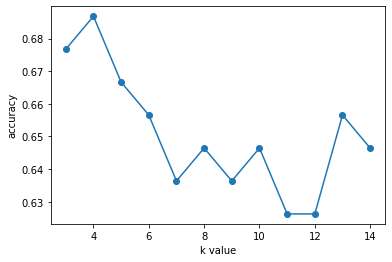

In [59]:
plt.plot(neighbors, acc_values, 'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [60]:
# from graph it clearly see that highest accuracy is for k value 4
# now we can make a model with k as 4
classifier = KNeighborsClassifier(n_neighbors=4, metric = 'minkowski')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [62]:
# now lets see how our model performed for KNN
print('Accuracy is:',accuracy_score(y_test,y_pred))

Accuracy is: 0.6868686868686869


In [ ]:
Conclusion
#  Accuracy of:
#  Logistic regression model : 72.7%
#  Decision Tree : 57.5%
#  K NEAREST NEIGHBOUR :68.6%
 
Out of the three Machine Learning algorithms used here, Logistic regression model is pretty good with
an accuracy of 72.7%.